In [52]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import hashlib
import glob
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create reviews

In [32]:
from src.ask import analyseText
from src.dbkg import consolidateBits

In [73]:
FILES = glob.glob("data/pages/*.html")
LS = []
for fi in FILES:
    with open(fi, "r") as f:
        LS.append([f.read().strip(),fi.split(os.sep)[-1].split(".")[0]])
len(LS)

799

In [74]:
txts = pd.DataFrame(LS,columns=["Source","hash"])
txts["long"] = txts.Source.apply(lambda x: len(str(x)))
txts.head(3)

,Source,hash,long
0,Ce projet vise à transformer les cours actuell...,7fdd64486b554e81c018d04aadeaed8b,1683
1,Ce projet regroupe plusieurs projets d'install...,ae16e1e592ede2766cc7d2fab6065ed2,985
2,"Bien qu’étant assez arborées, les cours d'écol...",97fb760d7bd5886a32c61bce40d585c0,855


In [47]:
allDFs = []
df = pd.read_parquet("data/xls/db.parquet.gzip").drop_duplicates()
items = df.Source.unique()

for te in LS:
    if te in items:
        N = len(df[df.Source == te])
        #if N < 10:
        #    DD = analyseText( te.strip(), TypeOfItem="Activities", PBN=False, Source="BudgetParis", Place="Paris", Reviewed=False, MIN=10-N, ow=False, seed=".m.", MODEL="gpt-3.5-turbo" )
    allDFs.append(DD)
pd.concat(allDFs).reset_index(drop=True)

NameError: name 'DD' is not defined

# Consolidate excels

In [3]:
df = consolidateBits(PATH="./data/xls/")
print(len(df),"reviews")

13298 reviews


In [8]:
from src.reportmgr import createExcel

In [9]:
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))

In [13]:
createExcel(df,"doc/WIP/Paris.xlsx","Texts from Paris","Paris","Review of Paris projects")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


'doc/WIP/Paris.xlsx'

# Creating visuals

In [35]:
import src.img as iImg
df = pd.read_parquet("data/xls/db.parquet.gzip")
df = df[~df.Source.str.contains("data/pages")]
df = df[df.Place == "Paris"]
items = df.Source.unique()
print(len(items))
df

527


,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet est un regroupement de propositions ...,The text focuses on art and culture proposals ...,Attractiveness,Culture and community identity,Neighbourhood,4,Enhancing community identity through art.,Art and cultural project proposals.,False
1,False,BudgetParis,Paris,Activities,Ce projet est un regroupement de propositions ...,The text mentions innovative art projects such...,Attractiveness,"Innovation, creativity and research",Building,3,Various innovative art projects described.,Art and cultural project proposals.,False
2,False,BudgetParis,Paris,Activities,Ce projet est un regroupement de propositions ...,The project involves community engagement by h...,Social cohesion,"Governance, empowerment and engagement",Neighbourhood,4,Community engagement project promoting social ...,Art and cultural project proposals.,False
3,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
4,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
13266,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
13267,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
13268,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [36]:
df.Place.unique()

array(['Paris'], dtype=object)

/home/kelu/projets/pariso37k/src/img.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/home/kelu/projets/pariso37k/src/img.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


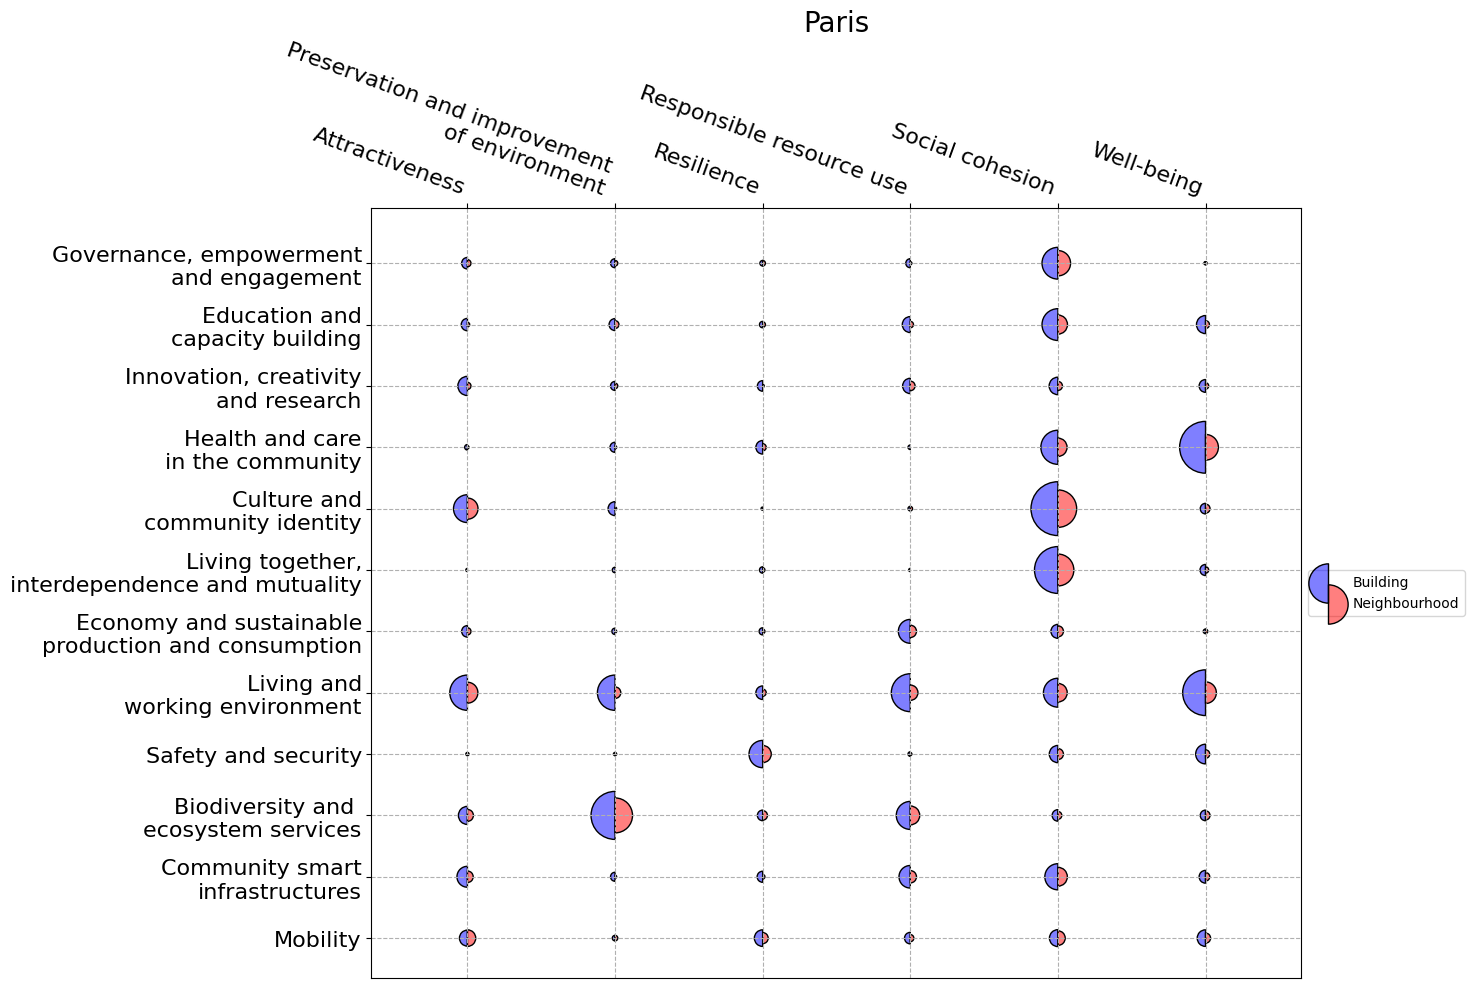

In [37]:
df = df[df.Place == "Paris"]

dfRef = pd.DataFrame(columns=df.columns)
dfUC = df

plt, ax = iImg.createImg(dfUC,dfRef,title="Paris")
plt.savefig("doc/WIP/Paris.png", bbox_inches='tight')
plt.savefig("doc/WIP/Paris.svg", bbox_inches='tight')

# Create reports

In [45]:
projets = pd.read_csv("data/bp_projets_gagnants.csv",sep=";")
projets

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Titre du projet lauréat,Thématique,Direction pilote du projet lauréat,Budget global du projet lauréat,Echelle du Budget participatif,Adresse du projet lauréat,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,Date de début des études du projet,Date de lancement des procédures du projet,Date de lancement des travaux du projet,Date prévisonnelle de livraison du projet,Date d'ouverture du projet au public,Dernière mise à jour des données du projet,hash
0,2204,NaN,https://decider.paris.fr/bp/jsp/site/Portal.js...,2014,NaN,Cadre de vie,Direction de la Voirie et des Déplacements,1500000,Budget participatif parisien,Place de l' Hotel de Ville - Esplanade de la L...,75004,Non,FIN,2017-07,2018-04,2018-01,2018-06,2020-02,NaN,246a21275461c443c674868193a525f8
1,2206,NaN,https://decider.paris.fr/bp/jsp/site/Portal.js...,2014,Des jardins sur les murs,Environnement,Direction des Espaces Verts et de l’Environnement,2000000,Budget participatif parisien,Place de l' Hotel de Ville - Esplanade de la L...,75004,Non,FIN,2015-01,2015-01,2015-03,2015-04,2021-12,NaN,a95bc5bf81835c7479f308735ff8ad50
2,3720,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Une zone de remise en forme au jardin Eole,Cadre de vie,Direction des Espaces Verts et de l’Environnement,110000,Budget participatif d’arrondissement,jardin d'Eole,75018,Oui,FIN,2017-11,2018-04,2018-04,2018-07,2020-03,NaN,c97a81d49318420ffa4f4233123f1820
3,3780,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,#VillePlusPropre,Propreté,Direction de la Propreté et de l’Eau,3000000,Budget participatif parisien,Place de l' Hôtel de Ville - Esplanade de la L...,75004,Non,FIN,2017-01,2018-09,2018-10,2018-10,2022-01,NaN,06b53e208075bd3c7ff11eba00e3f378
4,8597,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2019,Accessibilité au square des Batignolles,Solidarités,Direction des Espaces Verts et de l’Environnement,45000,Budget participatif d’arrondissement,Square des Batignolles,75017,Non,FIN,2020-01,2020-06,2020-06,2020-07,2020-07,NaN,d43ab90b7a2bd241ad1546f44cf74139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,6282,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Faciliter les traversées piétonnes du Canal Sa...,Prévention et sécurité,Direction de la Voirie et des Déplacements,200000,Budget participatif d’arrondissement,146 quai de Jemmapes,75010,Oui,TRAVAUX,2019-08,NaN,2024-02,2026-03,NaN,NaN,5d4a5a990a44974bd4d6fa068175a3fe
1210,6196,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Des arbres et des arbustes fruitiers dans le 20e,Environnement,Direction des Espaces Verts et de l’Environnement,100000,Budget participatif d’arrondissement,6 Place Gambetta,75020,Non,FIN,2018-10,2019-10,2019-12,2022-12,2024-02,NaN,cf0df1eb3105cf87622cfb1138abb280
1211,1879,NaN,https://decider.paris.fr/bp/jsp/site/Portal.js...,2015,Embellir les cours des écoles du 18e arrondiss...,Education et jeunesse,Direction des Affaires Scolaires,800000,Budget participatif d’arrondissement,1 Place Jules Joffrin,75018,Oui,FIN,2016-01,2016-05,2016-07,2018-01,2018-06,NaN,7b46b43d08bb7c4e700c5bfd597bddef
1212,2807,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2016,Plus d’arbres dans les rues du 10e,Environnement,Direction des Espaces Verts et de l’Environnement,250000,Budget participatif d’arrondissement,72 Rue du Faubourg Saint-Martin,75010,Non,FIN,2017-03,2018-04,2018-03,2018-03,2018-04,NaN,ea2e1e740e86254b11d1d02a974a2a29


In [88]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
txts = pd.read_parquet("data/txts.parquet.gzip")
projets['hash'] = projets['Lien URL vers le projet lauréat'].apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()) )
txts.columns = ["hash","Source","long"]
print(len(txts),len(df))
projets_h = projets.merge(txts,on="hash",how="left")
print(len(projets_h))
projets_hh = projets_h.merge(df,on="Source",how="right")
print(len(projets_hh))
projets_hh.head(3)

799 13298
1214
13298


,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Titre du projet lauréat,Thématique,Direction pilote du projet lauréat,Budget global du projet lauréat,Echelle du Budget participatif,Adresse du projet lauréat,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,10041.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021.0,Rapprocher la culture des habitant·e·s,Culture et patrimoine,Direction des Affaires Culturelles,360000.0,Budget participatif d’arrondissement,2 place Ferdinand Brunot,...,Paris,Activities,The text focuses on art and culture proposals ...,Attractiveness,Culture and community identity,Neighbourhood,4,Enhancing community identity through art.,Art and cultural project proposals.,False
1,10041.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021.0,Rapprocher la culture des habitant·e·s,Culture et patrimoine,Direction des Affaires Culturelles,360000.0,Budget participatif d’arrondissement,2 place Ferdinand Brunot,...,Paris,Activities,The text mentions innovative art projects such...,Attractiveness,"Innovation, creativity and research",Building,3,Various innovative art projects described.,Art and cultural project proposals.,False
2,10041.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021.0,Rapprocher la culture des habitant·e·s,Culture et patrimoine,Direction des Affaires Culturelles,360000.0,Budget participatif d’arrondissement,2 place Ferdinand Brunot,...,Paris,Activities,The project involves community engagement by h...,Social cohesion,"Governance, empowerment and engagement",Neighbourhood,4,Community engagement project promoting social ...,Art and cultural project proposals.,False


In [89]:
import geopandas as gpd

In [95]:
fp='data/budget-participatif_operations-projets-gagnants-realisations.geojson'
gdf = gpd.read_file(fp)
cols = list(gdf.columns)
cols[0] = "Identifiant du projet lauréat"
gdf.columns = cols
P = gdf.merge(projets_hh,on="Identifiant du projet lauréat",how="right")
print(list(P.columns))
P = P[P.Source.str.len() > 100]
P = P[P.Place == "Paris"]
P = P.sort_values(by="long").dropna(how= "any", axis=1).reset_index(drop=True)
print(len(P),"----",len(P.Source.unique()),"texts reviewed.")
print(list(P.columns))
P.to_parquet("data/dataset.parquet.gzip",compression="gzip")
P.head(3)

['Identifiant du projet lauréat', 'titre_operation', 'titre_projet_gagnant', 'edition', 'thematique', 'direction_pilote_operation', 'type_financement_operation', 'adresse_operation', 'arrondissement_operation', 'longitude', 'latitude', 'operation_q_pop', 'quartier_operation', 'avancement_operation', 'debut_etudes_operation', 'lancement_procedure_operation', 'lancement_travaux_operation', 'livraison_prev_operation', 'ouverture_operation', 'identifiant_projet_gagnant', 'lien_projet_soumis', 'lien_projet_gagnant', 'direction_pilote_projet', 'budget_global_projet_gagnant', 'echelle_bp', 'adresse_projet_gagnant', 'arrondissement_projet_gagnant', 'projet_q_pop', 'avancement_projet', 'debut_etudes_projet', 'lancement_procedure_projet', 'lancement_travaux_projet', 'livraison_prev_projet', 'ouverture_projet', 'derniere_mise_a_jour_donnees', 'geo_point_2d', 'geometry', 'Lien URL vers le projet soumis au vote', 'Lien URL vers le projet lauréat', 'Edition', 'Titre du projet lauréat', 'Thématique',

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,This proposal aims to enhance the attractivene...,Attractiveness,Living and working environment,Neighbourhood,4,Enhancing square with play elements.,Renovation of playground with colorful ground ...,False
1,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal aims to enhance the social cohesi...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing social cohesion through gatherings.,Renovation of playground with colorful ground ...,False
2,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal aims to improve the well-being of...,Well-being,Living and working environment,Building,4,Enhancing community play area.,Renovation of playground with colorful ground ...,False


# Documents

In [64]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [65]:
import pandas as pd
import hashlib, os

In [30]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))
IDS = list(df.ID.unique())
K = list(chunks(IDS, 10))
for k in range(len(K)):
    if not os.path.isfile("doc/WIP/Paris_"+str(k)+".xlsx"):
        DF = df[df.ID.isin(K[k])]
        createExcel(df,"doc/WIP/Paris_"+str(k)+".xlsx","Paris budget participatif","Paris","Review of the budget")
        print(k,"done")

NameError: name 'chunks' is not defined

# Import and consolidate

In [ ]:
from src.impt import integrateReview

In [ ]:
path ="doc/WIP/.xlsx"
pdr = integrateReview(path)
pdr

NameError: name 'integrateReview' is not defined

In [6]:
import pandas as pd
import OAI

In [96]:
df = pd.read_parquet("data/dataset.parquet.gzip")
df

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,This proposal aims to enhance the attractivene...,Attractiveness,Living and working environment,Neighbourhood,4,Enhancing square with play elements.,Renovation of playground with colorful ground ...,False
1,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal aims to enhance the social cohesi...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing social cohesion through gatherings.,Renovation of playground with colorful ground ...,False
2,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal aims to improve the well-being of...,Well-being,Living and working environment,Building,4,Enhancing community play area.,Renovation of playground with colorful ground ...,False
3,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The project introduces fun and engaging elemen...,Social cohesion,Culture and community identity,Neighbourhood,3,Enhancing community through vibrant space.,Renovation of playground with colorful ground ...,False
4,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal to brighten up the playground wit...,Attractiveness,Living and working environment,Building,4,Enhancing playground with colorful features.,Renovation of playground with colorful ground ...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget participatif parisien,75004.0,Non,LIVRAISON,...,Paris,Activities,The text addresses the importance of mobility ...,Attractiveness,Mobility,Neighbourhood,4,Enhancing city attractiveness through mobility.,Increase in waste production; environmental im...,False
4267,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget participatif parisien,75004.0,Non,LIVRAISON,...,Paris,Activities,There is a strong focus on preserving and impr...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,5,"Focus on environment preservation, biodiversity.",Increase in waste production; environmental im...,False
4268,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget participatif parisien,75004.0,Non,LIVRAISON,...,Paris,Activities,The text highlights initiatives that promote w...,Well-being,"Innovation, creativity and research",Building,3,Promoting well-being through creative solutions.,Increase in waste production; environmental im...,False
4269,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget p

In [97]:
h = OAI.Helper("iso_ask", "./cache")
h.GOTOCACHE = "./cache/"

In [98]:
def shortSummary(x):
    return h.ask(
                    "Give a title in english to the text below in up to 5 words. It cannot be longer than 5 words, and your answer must be only the title.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [99]:
def longSummary(x):
    return h.ask(
                    "Summarize in english the text below in up to  5 sentences. It cannot be longer than 5 sentences, and your answer must be only the summary.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [100]:
def Summary(x):
    return h.ask(
                    "Summarize in english the text below in up to 3 paragraphs. It cannot be longer than 3 paragraphs, and your answer must be only the summary.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [101]:
X = df[df.Source.str.len() > 100]
print(len(X.Source.unique()))
X.reset_index(drop=True)

527


,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,This proposal aims to enhance the attractivene...,Attractiveness,Living and working environment,Neighbourhood,4,Enhancing square with play elements.,Renovation of playground with colorful ground ...,False
1,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal aims to enhance the social cohesi...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing social cohesion through gatherings.,Renovation of playground with colorful ground ...,False
2,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal aims to improve the well-being of...,Well-being,Living and working environment,Building,4,Enhancing community play area.,Renovation of playground with colorful ground ...,False
3,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The project introduces fun and engaging elemen...,Social cohesion,Culture and community identity,Neighbourhood,3,Enhancing community through vibrant space.,Renovation of playground with colorful ground ...,False
4,3584.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Cadre de vie,13000.0,Budget participatif d’arrondissement,75011.0,Oui,FIN,...,Paris,Activities,The proposal to brighten up the playground wit...,Attractiveness,Living and working environment,Building,4,Enhancing playground with colorful features.,Renovation of playground with colorful ground ...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget participatif parisien,75004.0,Non,LIVRAISON,...,Paris,Activities,The text addresses the importance of mobility ...,Attractiveness,Mobility,Neighbourhood,4,Enhancing city attractiveness through mobility.,Increase in waste production; environmental im...,False
4267,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget participatif parisien,75004.0,Non,LIVRAISON,...,Paris,Activities,There is a strong focus on preserving and impr...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,5,"Focus on environment preservation, biodiversity.",Increase in waste production; environmental im...,False
4268,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget participatif parisien,75004.0,Non,LIVRAISON,...,Paris,Activities,The text highlights initiatives that promote w...,Well-being,"Innovation, creativity and research",Building,3,Promoting well-being through creative solutions.,Increase in waste production; environmental im...,False
4269,3788.0,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017.0,Solidarités,3500000.0,Budget p

In [102]:
df.loc[df.Source.str.len() > 100,"Source_Title"] = df.Source.apply(lambda x: shortSummary(x))
df.loc[df.Source.str.len() > 100,"Summary"] = df.Source.apply(lambda x: longSummary(x))
df.loc[df.Source.str.len() > 100,"Paragraph"] = df.Source.apply(lambda x: Summary(x))


In [ ]:
df[df.Source.str.len() > 100].reset_index(drop=True).to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")

# Pages

In [71]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df = df[~df.Source.str.contains("data/pages")]
df = df[df.Place == "Paris"]
df

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet est un regroupement de propositions ...,The text focuses on art and culture proposals ...,Attractiveness,Culture and community identity,Neighbourhood,4,Enhancing community identity through art.,Art and cultural project proposals.,False
1,False,BudgetParis,Paris,Activities,Ce projet est un regroupement de propositions ...,The text mentions innovative art projects such...,Attractiveness,"Innovation, creativity and research",Building,3,Various innovative art projects described.,Art and cultural project proposals.,False
2,False,BudgetParis,Paris,Activities,Ce projet est un regroupement de propositions ...,The project involves community engagement by h...,Social cohesion,"Governance, empowerment and engagement",Neighbourhood,4,Community engagement project promoting social ...,Art and cultural project proposals.,False
3,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
4,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
13266,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
13267,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
13268,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [69]:
DF = pd.read_parquet("data/dataset.parquet.gzip")

In [70]:
ALL = pd.concat([DF,df]).sort_values(by=["Source","Identifiant du projet lauréat"]).ffill().drop_duplicates().reset_index(drop=True)
ALL

KeyError: 'Identifiant du projet lauréat'

In [36]:
ALL.to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")